# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [8]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [9]:
df = df_test.append(df_train).reset_index(drop=True)

In [10]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [12]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Среднее', 'Неполное среднее', 'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'Управляющая компания', 'Логистика', 'Коммунальное хоз-во/Дорожные службы', 'ЧОП/Детективная д-ть', 'Транспорт', 'Информационные технологии', 'Строительство', 'Здравоохранение', 'Информационные услуги', 'Страхование', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Подбор персонала', 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Образование', 'Недвижимость', 'Торговля', 'Сельское хозяйство', 'Ресторанный бизнес/Общественное питание', 'Развлечения/Искусство', 'Энергетика', 'Маркетинг', 'Нефтегазовая промышленность', 'Сборочные производства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Действуем по ситуации
1) Для категориальных признаков, пропуски в данных при разбиении на столбцы признаки получат 0 во всех столбцах, таким образом, проблема исчезнет сама собой.
2) Числовых столбцов с пропусками в данном случае только 2 и для обоих можно проставить 0 и это будет соответствовать логике этих полей. Аналогично, можно поступить, например, с ORG_TP_FCAPITAL и другими столбцами, где отсутствие информации можно приравнять одному из значений

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Большую часть можно перекодировать с помощью get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [13]:
def det_edu_cat(edu):
    if edu == 'Неполное среднее':
        return 0
    elif edu == 'Среднее':
        return 1
    elif edu == 'Среднее специальное':
        return 2
    elif edu == 'Неоконченное высшее':
        return 3
    elif edu == 'Высшее':
        return 4
    elif edu == 'Два и более высших образования':
        return 5
    elif edu == 'Ученая степень':
        return 5

def det_income_cat(income):
    if income == 'до 5000 руб.':
        return 0
    elif income == 'от 5000 до 10000 руб.':
        return 1
    elif income == 'от 10000 до 20000 руб.':
        return 2
    elif income == 'от 20000 до 50000 руб.':
        return 4
    elif income == 'свыше 50000 руб.':
        return 8

def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis = 1)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output.PREVIOUS_CARD_NUM_UTILIZED = df_output.PREVIOUS_CARD_NUM_UTILIZED.fillna(0)
    df_output.WORK_TIME = df_output.WORK_TIME.fillna(0)
    df_output.ORG_TP_FCAPITAL = df_output.ORG_TP_FCAPITAL.fillna("Без участия")
    
    #df_output['EDU_GROUP'] = df_output['EDUCATION'].map(det_edu_cat)
    #df_output = df_output.drop(['EDUCATION'], axis = 1)
    
    #df_output['INCOME_GROUP'] = df_output['FAMILY_INCOME'].map(det_income_cat)
    #df_output = df_output.drop(['FAMILY_INCOME'], axis = 1)
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'GEN_INDUSTRY', 'MARITAL_STATUS', 'GEN_TITLE', 
                                                   'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
                                                   'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
                                                  'TP_PROVINCE', 'REGION_NM'])
    
    return df_output

In [14]:
df_preproc = df.pipe(preproc_data)

In [15]:
df_preproc.head(5)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [16]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 444 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(405)
memory usage: 20.6+ MB


In [17]:
for i in df_preproc.columns: # перебираем все столбцы
    if str(df_preproc[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_preproc[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

sample
{'test', 'train'}




In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
Y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis = 1)
Y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis = 1)

In [20]:
Y.shape

(15223,)

In [21]:
X.shape

(15223, 442)

In [22]:
Y_test.shape

(14910,)

In [23]:
X_test.shape

(14910, 442)

#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
## Your Code Here


In [25]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [26]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
rfc = RandomForestClassifier(max_depth = 8)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
lr = LogisticRegression(penalty='l1')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
metrics = pd.DataFrame()
metrics["titles"] = ["DTC", "RFC", "LR"]
metrics["precision"] = [precision_score(dtc.predict(x_test), y_test), precision_score(rfc.predict(x_test), y_test), precision_score(lr.predict(x_test), y_test)]    
metrics["recall"] = [recall_score(dtc.predict(x_test), y_test), recall_score(rfc.predict(x_test), y_test), recall_score(lr.predict(x_test), y_test)]
metrics["accuracy"] = [accuracy_score(dtc.predict(x_test), y_test), accuracy_score(rfc.predict(x_test), y_test), accuracy_score(lr.predict(x_test), y_test)]

/home/never/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [30]:
precision, recall, accuracy

([0.013114754098360656, 0.0, 0.00819672131147541],
 [0.25806451612903225, 0.0, 0.3125],
 [0.8755971337579618, 0.8785828025477707, 0.8773885350318471])

In [58]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Your Code Hereb

In [39]:
metrics

,titles,precision,recall,accuracy
0,DTC,0.013115,0.258065,0.875597
1,RFC,0.000000,0.000000,0.878583
2,LR,0.008197,0.312500,0.877389


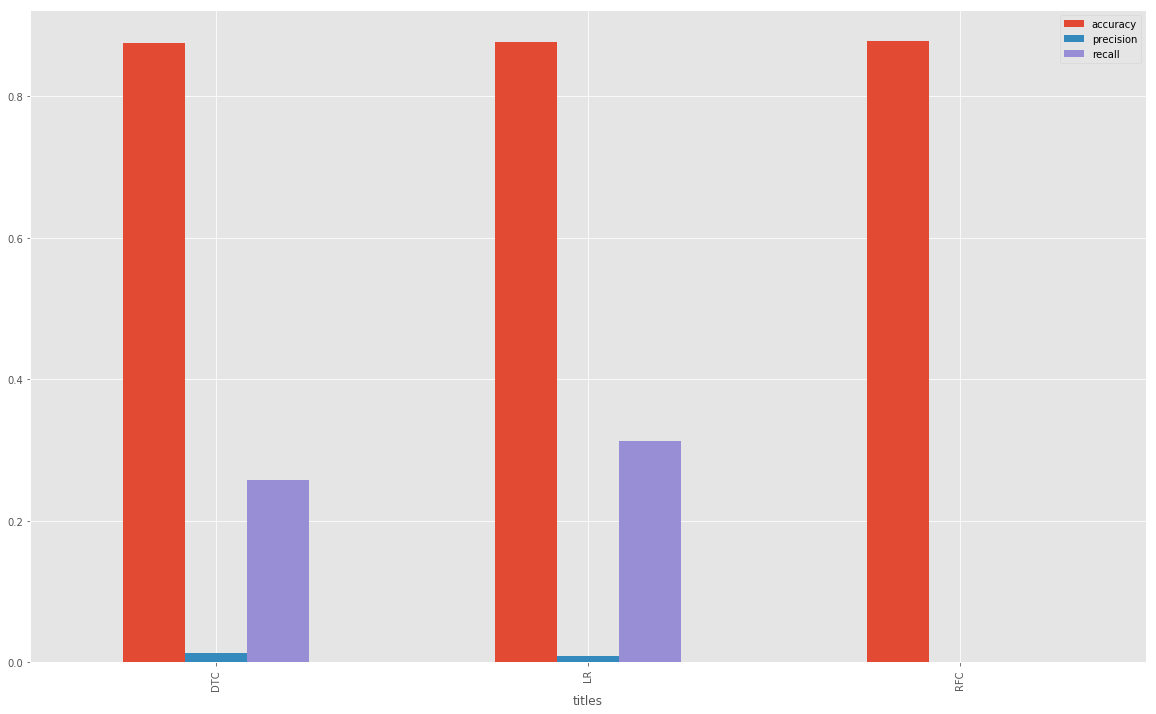

In [62]:
_, ax = plt.subplots(figsize=(20,12))

metrics.pivot_table(index='titles', aggfunc='mean').plot(
    kind='bar', stacked=False, ax=ax
)
plt.show()

(-0.01, 1.01)

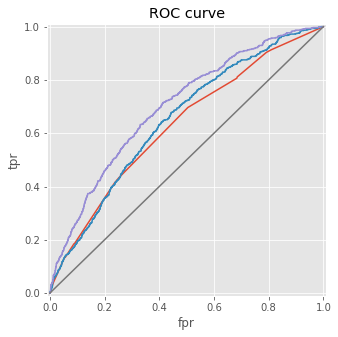

In [359]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [360]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

#rfc_score = [,], dtc_score = [,], lr_score = [,]
#for train_index, test_index in cv.split(x_train, y_train):
    
 #       X_train, X_test = X[train_index], X[test_index]
 #       y_train, y_test = y[train_index], y[test_index]

## Your Code Here
dtc_score = cross_val_score(
    DecisionTreeClassifier(max_depth = 5),
    x_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
dtc_score

0.6055381789504919

In [361]:
rfc_score = cross_val_score(
    RandomForestClassifier(max_depth = 7),
    x_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
rfc_score

0.6361283786392594

In [362]:
lr_score = cross_val_score(
    LogisticRegression(penalty='l1'),
    x_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
lr_score

0.6724442327682392

In [363]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 1)
lasso_score = cross_val_score(
    lasso,
    x_train,
    y_train,
    scoring='roc_auc',
    cv = 10
).mean()
lasso_score

0.6312937757241027

In [364]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

predict = lr.predict_proba(X_test)
## Your Code Here

In [365]:
# Померить roc_auc на тесте
roc_auc_score(Y_test, predict[:,1])

0.6915076856274425